In [36]:
#import libraries used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Read in data
StudentDataFrame = pd.read_csv("StudentsPerformance.csv")

In [37]:
# look to see if data was successfully read
StudentDataFrame.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [38]:
# see if any data is missing or null
for col in StudentDataFrame.columns:
    is_missing = np.mean(StudentDataFrame[col].isnull())
    print('{} - {}%'.format(col, is_missing))

gender - 0.0%
race/ethnicity - 0.0%
parental level of education - 0.0%
lunch - 0.0%
test preparation course - 0.0%
math score - 0.0%
reading score - 0.0%
writing score - 0.0%


In [39]:
# See how many columns there are and their data types
StudentDataFrame.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [40]:
# Find out the unique values of gender
print(StudentDataFrame['gender'].unique())

['female' 'male']


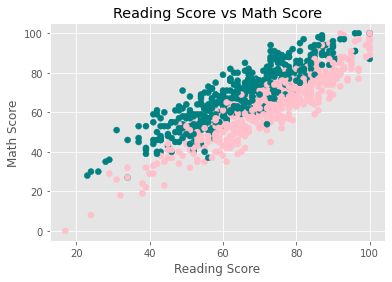

In [41]:
# Scatter plot with Reading Score vs Math Score 
# Im curious if there being a male or female has a effect of the Scores so to 
# differentiate from Female and Male, (female = pink) (male = teal)
df = StudentDataFrame
color = ['pink' if t == 'female' else 'teal' for t in df.gender]
plt.title('Reading Score vs Math Score')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.scatter(x = df['reading score'], y = df['math score'], c =color)


After taking a glance at the scatter plot, there appears to be a 
difference in scores between male and females. Males tend to have 
better math scores while females tend to have better reading scores

In [42]:
print(StudentDataFrame['test preparation course'].unique())

['none' 'completed']


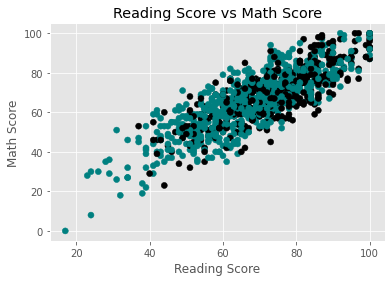

In [43]:
# Im curious if completeing test prep has a effect of the Scores so to 
# differentiate from completed or not completed, (completed = teal) (not completed = black)

color = ['black' if t == 'completed' else 'teal' for t in df['test preparation course']]
plt.title('Reading Score vs Math Score')
plt.xlabel('Reading Score')
plt.ylabel('Math Score')
plt.scatter(x = df['reading score'], y = df['math score'], c =color)

After taking a glance at the scatter plot, there appears to be a slight effect on student performace if they completed test prep

In [44]:
# Curious to see if the level of education of parents has an effect on student's performace
# First, to be able to compare level of education and test scores, (parents level of education) must
# be converted into an integer so it would be comparable to test scores

# Find out the unique values and the total of parent level of education

print(StudentDataFrame['parental level of education'].unique(), 
      " Total: ", StudentDataFrame['parental level of education'].nunique())

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']  Total:  6


In [45]:
# Create An education column that relates to parent education and 
# make it comparable to other columns by converting it to type int 

df["education"] = ''
education = [
                (df['parental level of education'] == 'some high school'),
                (df['parental level of education'] == 'high school'),
                (df['parental level of education'] == 'some college'),
                (df['parental level of education'] == "associate's degree"),
                (df['parental level of education'] == "bachelor's degree"),
                (df['parental level of education'] == "master's degree")
            ]

levels = ['1','2','3','4','5','6']
levelsStr = ['some high school','high school','some college',"associate's degree","bachelor's degree", "master's degree"]

df['education'] = np.select(education,levels)
df['education'] = df['education'].astype('int64')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,education
0,female,group B,bachelor's degree,standard,none,72,72,74,5
1,female,group C,some college,standard,completed,69,90,88,3
2,female,group B,master's degree,standard,none,90,95,93,6
3,male,group A,associate's degree,free/reduced,none,47,57,44,4
4,male,group C,some college,standard,none,76,78,75,3


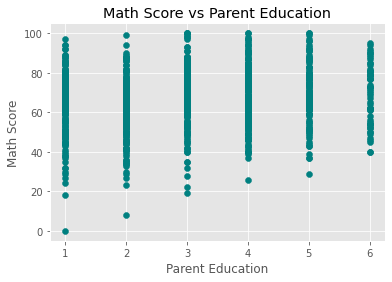

In [46]:
# Curious to see if math scores are affected by the parent's level of education

plt.title('Math Score vs Parent Education')
plt.xlabel('Parent Education')
plt.ylabel('Math Score')
plt.scatter(x = df['education'], y = df['math score'], c = 'teal')

After taking a glance at the scatter plot, there appears to be a slight affect of student's performaces based on parent's level of education. As the parents level of education increases, the students performace on math scores increases and the spread of scores of each level decreases.


In [47]:
# Now I want to visualize a correlation table to see if there is any correlation with the columns of the data

In [48]:
# First we have to convert all the columns into numerical datatypes since
# the correlation function only accepts numerical values.
# Find out the unique values and the total for geander, ethnicity, lunch, and test prep

print('gender: ',      StudentDataFrame['gender'].unique(),
      '\n Total: ',    StudentDataFrame['gender'].nunique(),
      '\nethnicity: ', StudentDataFrame['race/ethnicity'].unique(), 
      '\n Total: ',    StudentDataFrame['race/ethnicity'].nunique(),         
      '\nlunch: ',     StudentDataFrame['lunch'].unique(),
      '\n Total: ',    StudentDataFrame['lunch'].nunique(), 
      '\ntest prep: ', StudentDataFrame['test preparation course'].unique(),
      '\n Total: ',    StudentDataFrame['test preparation course'].nunique())

gender:  ['female' 'male'] 
 Total:  2 
ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E'] 
 Total:  5 
lunch:  ['standard' 'free/reduced'] 
 Total:  2 
test prep:  ['none' 'completed'] 
 Total:  2


In [49]:
# Create an gender, ethnicity, lunch, and test prep column that relates to student performance and 
# make it comparable to other columns by converting it to type int 

df["Gender"] = ''
gender = [
                (df['gender'] == 'female'),
                (df['gender'] == 'male')
            ]

glevels = ['0','1'] # since there are 2 gender groups

df['Gender'] = np.select(gender,glevels)
df['Gender'] = df['Gender'].astype('int64')

df["ethnicity"] = ''
ethnicity = [
                (df['race/ethnicity'] == 'group A'),
                (df['race/ethnicity'] == 'group B'),
                (df['race/ethnicity'] == 'group C'),
                (df['race/ethnicity'] == 'group D'),
                (df['race/ethnicity'] == 'group E')
            ]

elevels = ['1','2','3','4','5'] # since there are 5 ethnicity groups

df['ethnicity'] = np.select(ethnicity,elevels)
df['ethnicity'] = df['ethnicity'].astype('int64')

df["Lunch"] = ''
lunch = [
                (df['lunch'] == 'standard'),
                (df['lunch'] == 'free/reduced')
            ]

lunchlevels = ['0','1'] # since there are 2 lunch groups

df['Lunch'] = np.select(lunch,lunchlevels)
df['Lunch'] = df['Lunch'].astype('int64')

df["Testprep"] = ''
testprep = [
                (df['test preparation course'] == 'none'),
                (df['test preparation course'] == 'completed')
            ]

tlevels = ['0','1'] # since there are 2 lunch groups

df['Testprep'] = np.select(testprep,tlevels)
df['Testprep'] = df['Testprep'].astype('int64')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,education,Gender,ethnicity,Lunch,Testprep
0,female,group B,bachelor's degree,standard,none,72,72,74,5,0,2,0,0
1,female,group C,some college,standard,completed,69,90,88,3,0,3,0,1
2,female,group B,master's degree,standard,none,90,95,93,6,0,2,0,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,4,1,1,1,0
4,male,group C,some college,standard,none,76,78,75,3,1,3,0,0


In [50]:
# Look at correlation chart to see if there is any correlation between the columns
# only works on numerical fields
df.corr(method = 'pearson')

,math score,reading score,writing score,education,Gender,ethnicity,Lunch,Testprep
math score,1.000000,0.817580,0.802642,0.159432,0.167982,0.216415,-0.350877,0.177702
reading score,0.817580,1.000000,0.954598,0.190908,-0.244313,0.145253,-0.229560,0.241780
writing score,0.802642,0.954598,1.000000,0.236715,-0.301225,0.165691,-0.245769,0.312946
education,0.159432,0.190908,0.236715,1.000000,-0.043934,0.095906,0.023259,-0.007143
Gender,0.167982,-0.244313,-0.301225,-0.043934,1.000000,-0.001502,-0.021372,0.006028
ethnicity,0.216415,0.145253,0.165691,0.095906,-0.001502,1.000000,-0.046563,0.017508
Lunch,-0.350877,-0.229560,-0.245769,0.023259,-0.021372,-0.046563,1.000000,0.017044
Testprep,0.177702,0.241780,0.312946,-0.007143,0.006028,0.017508,0.017044,1.000000


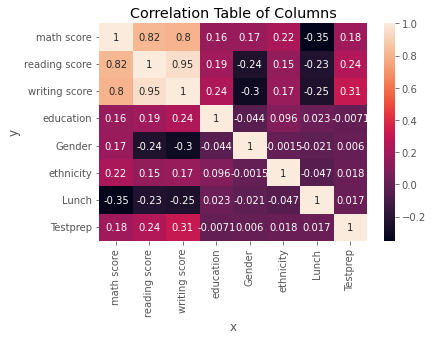

In [51]:
# Since there are alot of of numbers in the chart, a heatmap was used to help visualize
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Table of Columns')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [52]:
# To see the value with most correlation, we would have to sort the correlation values 
# and only list the values that are significant ( Greater than 0.5)

df_temp = df

correlation_mat = df_temp.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

math score     writing score    0.802642
writing score  math score       0.802642
reading score  math score       0.817580
math score     reading score    0.817580
writing score  reading score    0.954598
reading score  writing score    0.954598
math score     math score       1.000000
ethnicity      ethnicity        1.000000
Gender         Gender           1.000000
education      education        1.000000
writing score  writing score    1.000000
reading score  reading score    1.000000
Lunch          Lunch            1.000000
Testprep       Testprep         1.000000
dtype: float64

By looking at the values, it seems like the trend is that a student that score high in writing, correlates in high score in reading as well and vise versa. 